In [9]:
import pandas as pd

dfPath = r'fashion-mnist_train.csv'
trainData = pd.read_csv(dfPath)
dfPath = r'fashion-mnist_test.csv'
testData = pd.read_csv(dfPath)
print(trainData.head())
# checking how the data looks

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

In [10]:
# Check if any rows have null values
null_rows = trainData.isnull().any(axis=1)
print('Number of rows with null values:', sum(null_rows))
#  There were no null values

# Check if there is any duplicate rows
duplicate_rows = trainData[trainData.duplicated()]
print("Number of duplicate rows: ", len(duplicate_rows))


Number of rows with null values: 0
Number of duplicate rows:  43


In [12]:
# getting rid of duplicate rows
trainData = trainData.drop_duplicates()

# Check if problem is solved
duplicate_rows = trainData[trainData.duplicated()]
print("Number of duplicate rows: ", len(duplicate_rows))

Number of duplicate rows:  0


In [13]:
X_train = trainData.drop(columns=['label'])
y_train = trainData['label']
X_test = testData.drop(columns=['label'])
y_test = testData['label']

In [24]:
import numpy as np

#PCA

def myPCA(X, k):
    # STEP 1: Normalizing
    mean = np.mean(X, axis=0)
    X_mean = X - mean

    # STEP 2: Covariance matrix
    covariance = np.cov(X_mean.T)

    # STEP 3: Eigenvalues and eigenvectors
    eig_val, eig_vec = np.linalg.eig(covariance)

    # Sorting them in descending order
    index = eig_val.argsort()[::-1]
    eig_vec = eig_vec[:, index]

    # Applying dimensionality reduction
    answer = X_mean @ eig_vec[:, :k]

    return answer

PCA_components = myPCA(X_train,3)


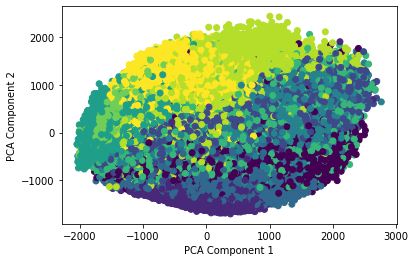

In [25]:
# 2d visualization

import matplotlib.pyplot as plt

plt.scatter(PCA_components[0], PCA_components[1], c=y_train)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


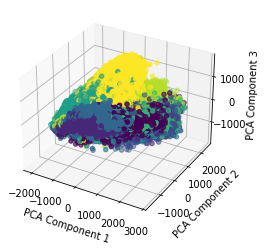

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA_components[0],PCA_components[1], PCA_components[2], c=y_train)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()